In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import sqlite3
import seaborn as sns
import numpy.polynomial.polynomial as poly

In [ ]:
# -- Bendras kasmėnesinis pardavimų skaičius? (lentelė: SalesOrderHeader)
# -- Mėnesiniai pardavimai pagal šalį (SalesOrderHeader, SalesTerritory, CountryRegion)
# -- Kurios parduotuvės pasirodo geriausiai? (SalesOrderHeader, Store)
# -- Palyginkite Online versus Store pagal Sales count ir Revenue: (SalesOrderHeader, , jei OnlineOrderFlag = 1,
# -- tai čia Online užsakymas.
# -- atsakykite į klausimą, ar verta uždaryti/plėsti/nekeisti fizinių parduotuvių skaičiaus 
# -- eiti į Online, neiti į online?
# -- Pagrįskite.

# -- -- Koks vidutinis vieno užsakymo dydis kiekvienoje šalyje? 
# -- (SalesOrderHeader,SalesOrderDetail, SalesTerritory, CountryRegion) 

In [87]:
SDB = sqlite3.connect(r"C:\Users\pauli\Downloads\AdventureWorks2022.db")
Cs = SDB.cursor()
sql="""select * from `Sales/SalesOrderHeader`;"""
Cs.execute(sql)
ans = Cs.fetchall()
df1 = pd.read_sql_query(sql, con=SDB)

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   31465 non-null  int64  
 1   SalesOrderID            31465 non-null  int64  
 2   RevisionNumber          31465 non-null  int64  
 3   OrderDate               31465 non-null  object 
 4   DueDate                 31465 non-null  object 
 5   ShipDate                31465 non-null  object 
 6   Status                  31465 non-null  int64  
 7   OnlineOrderFlag         31465 non-null  int64  
 8   SalesOrderNumber        31465 non-null  object 
 9   PurchaseOrderNumber     3806 non-null   object 
 10  AccountNumber           31465 non-null  object 
 11  CustomerID              31465 non-null  int64  
 12  SalesPersonID           3806 non-null   float64
 13  TerritoryID             31465 non-null  int64  
 14  BillToAddressID         31465 non-null

In [89]:
df1['menesis']=df1['OrderDate'].apply(lambda x: x.split(' ')[0][0:7])

In [90]:
df1 = df1.groupby(['menesis'])['Status'].count().reset_index()

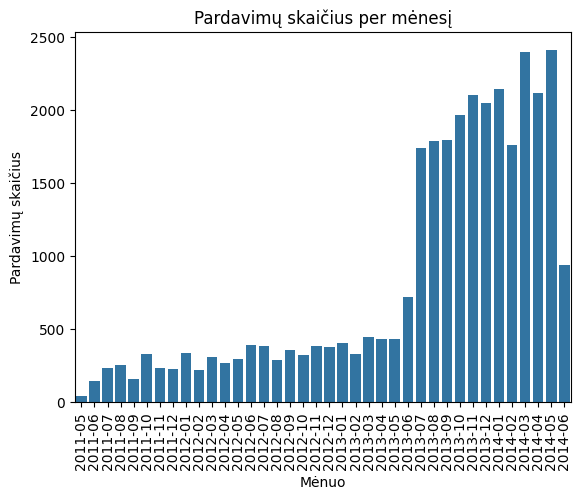

In [ ]:
sns.barplot(x='menesis', y='Status', data=df1)

plt.title('Pardavimų skaičius per mėnesį')
plt.xlabel('Mėnuo')
plt.ylabel('Pardavimų skaičius')
plt.xticks(rotation=90)
plt.show()

In [94]:
SDB = sqlite3.connect(r"C:\Users\pauli\Downloads\AdventureWorks2022.db")
Cs = SDB.cursor()
sql="""select * from `Sales/SalesOrderHeader`;"""
Cs.execute(sql)
ans = Cs.fetchall()
df1 = pd.read_sql_query(sql, con=SDB)

sql="""select * from `Sales/SalesTerritory`;"""
Cs.execute(sql)
ans = Cs.fetchall()
df2 = pd.read_sql_query(sql, con=SDB)

sql="""select * from `Person/CountryRegion`;"""
Cs.execute(sql)
ans = Cs.fetchall()
df3 = pd.read_sql_query(sql, con=SDB)

In [95]:
df = pd.merge(df1, df2, left_on='TerritoryID', right_on='TerritoryID', how='left')

In [96]:
df = pd.merge(df, df3, left_on='CountryRegionCode', right_on='CountryRegionCode', how='left')
df['menesis']=df['OrderDate'].apply(lambda x: x.split('-')[1])

In [97]:
df['menesis']=df1['OrderDate'].apply(lambda x: x.split(' ')[0][0:7])

In [98]:
df = df.groupby(['menesis', 'Name_y'])['Status'].count().reset_index()

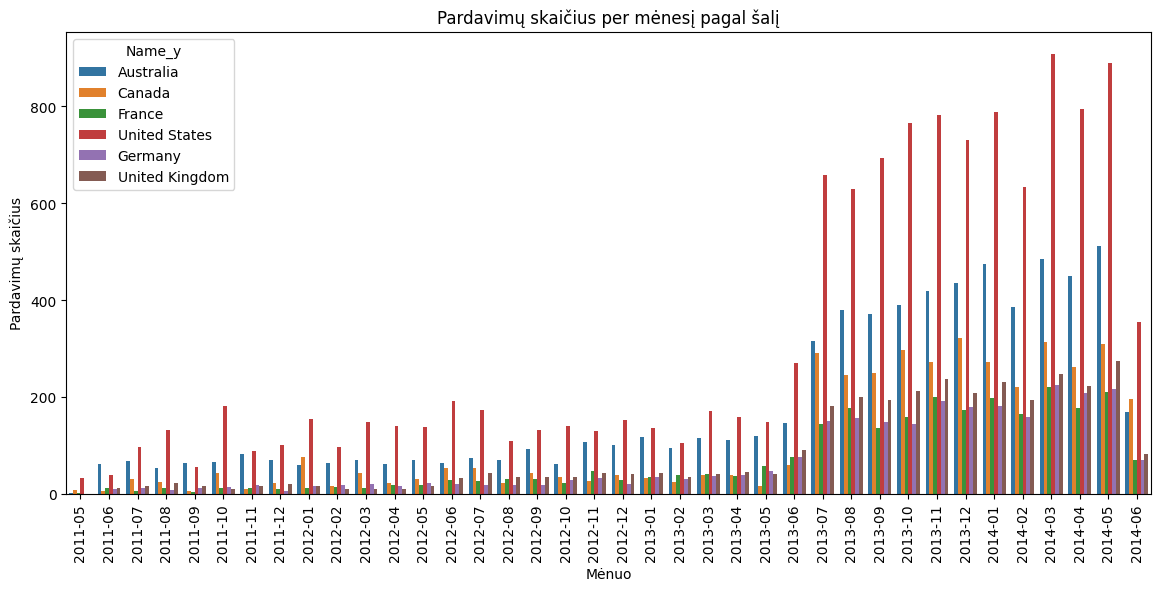

In [104]:
plt.figure(figsize=(14, 6))

sns.barplot(x='menesis', y='Status', hue='Name_y', data=df)

plt.title('Pardavimų skaičius per mėnesį pagal šalį')
plt.xlabel('Mėnuo')
plt.ylabel('Pardavimų skaičius')
plt.xticks(rotation=90)

plt.show()

In [78]:
SDB = sqlite3.connect(r"C:\Users\pauli\Downloads\AdventureWorks2022.db")
Cs = SDB.cursor()
sql="""select * from `Sales/SalesOrderHeader`;"""
Cs.execute(sql)
ans = Cs.fetchall()
df1 = pd.read_sql_query(sql, con=SDB)

sql="""select * from `Sales/Store`;"""
Cs.execute(sql)
ans = Cs.fetchall()
df2 = pd.read_sql_query(sql, con=SDB)

In [71]:
df1=df1['SalesPersonID'].reset_index()

In [72]:
df = pd.merge(df1, df2, left_on='SalesPersonID', right_on='SalesPersonID', how='left')

In [73]:
df = df.groupby(['Name'])['SalesPersonID'].count().reset_index()

In [75]:
df = df.sort_values(by='SalesPersonID', ascending=False).head(50)

In [77]:
df.tail(20)

,Name,SalesPersonID
203,First Bike Store,473
213,Fitness Hotel,473
634,Travel Systems,473
216,Fitness Toy Store,473
173,Extras Sporting Goods,473
19,All Seasons Sports Supply,473
680,Westside Cycle Store,473
581,Summer Sports Place,473
415,Paint Supply,473
660,Valley Bicycle Specialists,473


In [ ]:
# SELECT
# CASE WHEN OnlineOrderFlag = 1 THEN 'Online' ELSE 'Store' END AS OrderOrigin,
# strftime('%Y' , OrderDate) AS OrderYear,
# strftime('%m' , OrderDate) AS OrderMonth,
# COUNT(SalesOrderId) AS TotalSales,
# SUM(TotalDue) AS totalRevenue
# FROM `Sales/SalesOrderHeader`
# GROUP BY
# strftime('%Y' , OrderDate),
# strftime('%m' , OrderDate),
# OnlineOrderFlag
# ORDER BY
# OrderOrigin,
# OrderYear DESC,
# OrderMonth DESC;